In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:

!git clone "https://github.com/AsharZafar/ML.git"
df=pd.read_csv("/content/ML/K mean clustering/income.csv")

fatal: destination path 'ML' already exists and is not an empty directory.


In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


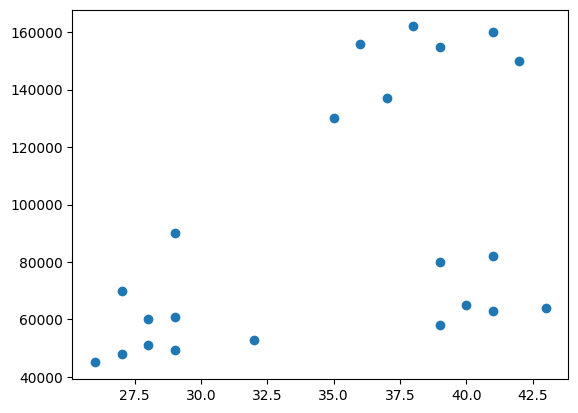

In [ ]:
plt.scatter(df["Age"],df["Income($)"])

In [ ]:
km=KMeans(n_clusters=3)
km
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
#appending column in data

df["clusters"]=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


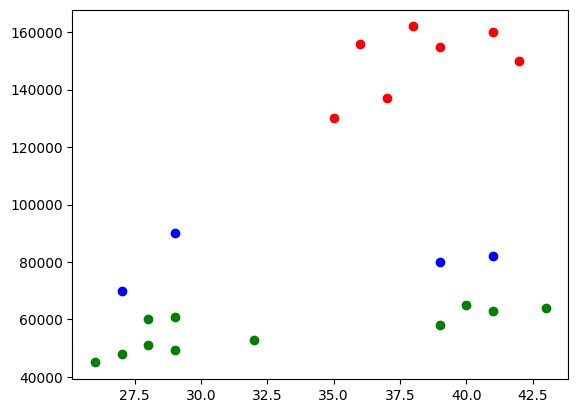

In [ ]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0.Age,df0["Income($)"],color="green")
plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="blue")

**here we can see the problem that blue cluster is aligned with red one so what we will do we shall scale our plot properly as you can see age is low and income is alot according to graph so using #minmaxscaling function

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])

MinMaxScaler()

In [ ]:
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),clusters
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [ ]:
#Also doing for age
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
#again applying k means
Km=KMeans (n_clusters=3)
Km
Y_predicted=Km.fit_predict(df[["Age","Income($)"]])
Y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df["cluster"]=Y_predicted
df.drop("clusters",axis=1,inplace=True)

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


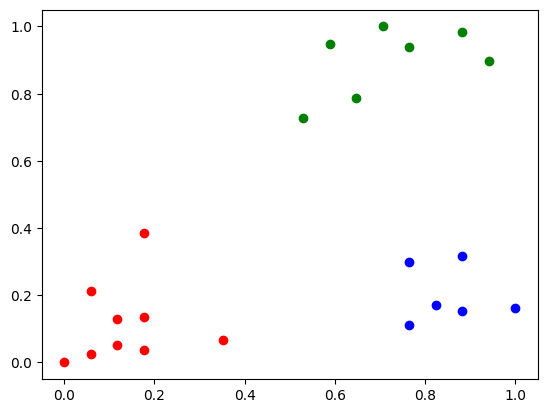

In [ ]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0["Age"],df0["Income($)"],color="green")
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="blue")

In [ ]:
#For centroids
Km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

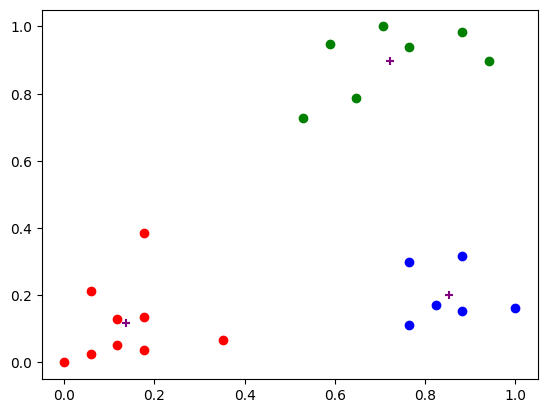

In [ ]:

df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0["Age"],df0["Income($)"],color="green")
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="blue")
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color="purple",marker="+", label="clusters/centroids")
#.                            TAking all rows &first column,Taking all rows second column

# this is a simple data but in real you have to face alot of messy data so use
"Elbow method"

Usning SSE for elcow method error and defining the range

In [ ]:
X=df.drop("Name",axis=1)

In [ ]:
X

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [ ]:
K_range=range(1,10)
SSE=[]
for k in K_range:
    km=KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)# for SSE WE USE inertia_ and then append it to the sse array that we created in above

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
SSE

[18.388556966533635,
 5.945614491472593,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.16869711728567788,
 0.13265419827245162,
 0.10497488680620906]

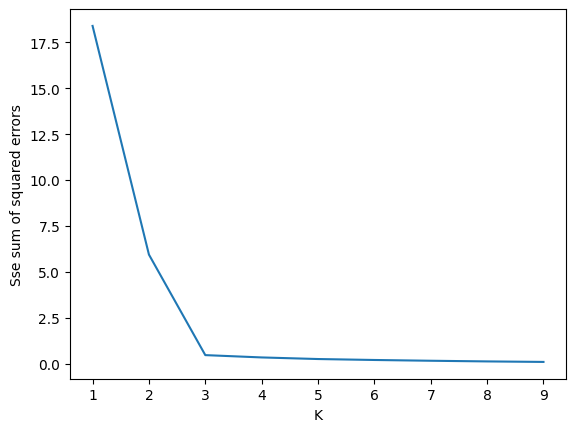

In [ ]:
plt.xlabel("K")
plt.ylabel("Sse sum of squared errors")
plt.plot(K_range,SSE)

#As we can see from the plot the elbow rises at 3 so the number of vlusters should be 3

#EXERCISE

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.Figure out if any preprocessing such as scaling would help hereDraw elbow plot and from that figure out optimal value of k

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["targets"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.drop(["sepal length (cm)","sepal width (cm)",axis=1,inplace=True)

KeyError: "['sepal length (cm)', 'sepal width (cm)'] not found in axis"

In [ ]:

df.drop(["targets"],axis=1,inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)
yp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df["clusters"]=yp
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [ ]:
df.clusters.unique()

array([1, 0, 2], dtype=int32)

In [ ]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

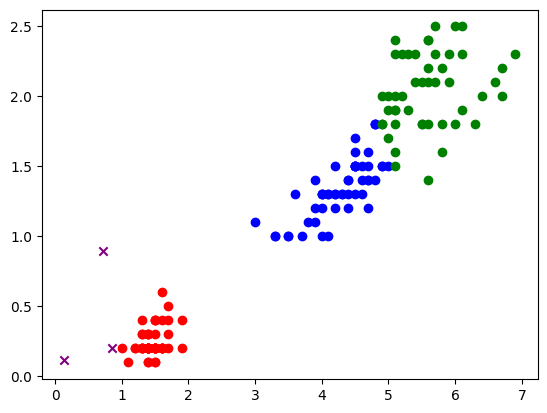

In [ ]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="blue")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green")
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color="purple",marker="x")

In [ ]:
SSE=[]
K_range=range(1,10)
for k in K_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    SSE.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
%matplotlib inline

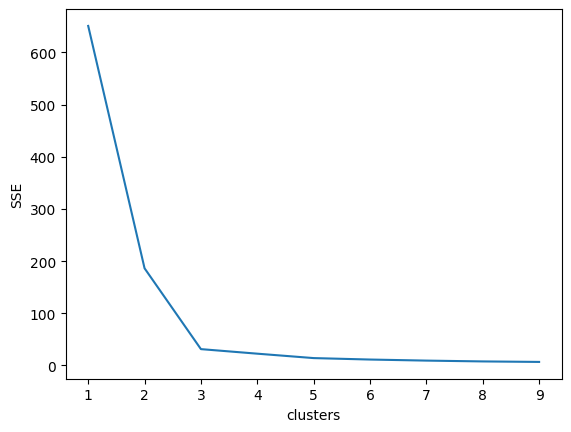

In [ ]:
plt.xlabel("clusters")
plt.ylabel("SSE")
plt.plot(K_range,SSE)